In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
# Define the path to the data folder
data_folder = 'dados'

# Read the CSV files
#osd_379_assays = pd.read_csv(os.path.join(data_folder, 'OSD-379-assays.csv'))
#osd_379_samples = pd.read_csv(os.path.join(data_folder, 'OSD-379-samples.csv'))
osd_665_assays = pd.read_csv(os.path.join(data_folder, 'OSD-665-assays.csv'))
osd_665_samples = pd.read_csv(os.path.join(data_folder, 'OSD-665-samples.csv'))

# Display the first few rows of each dataframe
# print("OSD-379 Assays:")
# print(osd_379_assays.head())
# print("\nOSD-379 Samples:")
# print(osd_379_samples.head())
print("\nOSD-665 Assays:")
print(osd_665_assays.head())
print("\nOSD-665 Samples:")
print(osd_665_samples.head())




OSD-665 Assays:
                  Sample Name             Protocol REF  \
0  RR23_R-EDL_FLT_F1_techrep1  Nucleic Acid Extraction   
1  RR23_R-EDL_FLT_F1_techrep2  Nucleic Acid Extraction   
2           RR23_R-EDL_FLT_F2  Nucleic Acid Extraction   
3           RR23_R-EDL_FLT_F3  Nucleic Acid Extraction   
4           RR23_R-EDL_FLT_F4  Nucleic Acid Extraction   

  Parameter Value: QA Instrument     Parameter Value: QA Assay  \
0       Agilent 4200 TapeStation  Agilent RNA ScreenTape Assay   
1       Agilent 4200 TapeStation  Agilent RNA ScreenTape Assay   
2       Agilent 4200 TapeStation  Agilent RNA ScreenTape Assay   
3       Agilent 4200 TapeStation  Agilent RNA ScreenTape Assay   
4       Agilent 4200 TapeStation  Agilent RNA ScreenTape Assay   

  Parameter Value: QA Score                Extract Name     Protocol REF.1  \
0                  8.5 RINe  RR23_R-EDL_FLT_F1_techrep1  Spike-in Protocol   
1                  8.5 RINe  RR23_R-EDL_FLT_F1_techrep2  Spike-in Protocol   
2  

In [4]:
# Split the "Parameter Value: QA Score" column and extract the numerical value
osd_665_assays['QA Score'] = osd_665_assays['Parameter Value: QA Score'].str.extract(r'(\d+\.?\d*)').astype(float)

0     8.5
1     8.5
2     8.4
3     8.5
4     8.4
5     9.1
6     8.4
7     8.6
8     8.6
9     8.6
10    8.4
11    8.4
12    8.4
13    8.6
14    8.5
15    8.3
16    8.6
17    8.8
18    8.6
19    8.6
20    8.7
21    8.7
22    8.6
23    8.4
24    8.6
Name: QA Score, dtype: float64

In [6]:
osd_665_assays.dtypes

Sample Name                                   object
Protocol REF                                  object
Parameter Value: QA Instrument                object
Parameter Value: QA Assay                     object
Parameter Value: QA Score                     object
Extract Name                                  object
Protocol REF.1                                object
Parameter Value: Spike-in Quality Control     object
Parameter Value: Spike-in Mix Number          object
Protocol REF.2                                object
Parameter Value: Library Selection            object
Parameter Value: Library Layout               object
Parameter Value: Stranded                     object
Parameter Value: Library QA Instrument        object
Parameter Value: Library QA Assay             object
Parameter Value: Fragment Size                object
Parameter Value: Library Batch Number         object
Protocol REF.3                                object
Parameter Value: Sequencing Instrument        

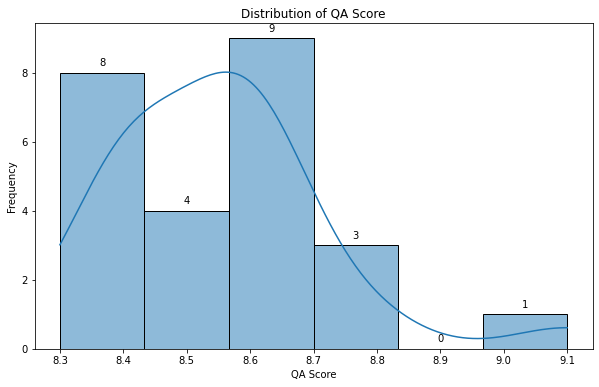

In [7]:
# Create a histogram using seaborn
plt.figure(figsize=(10, 6))
ax = sns.histplot(osd_665_assays['QA Score'], kde=True)

# Annotate each bar with its height
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.0f}', 
                xy=(p.get_x() + p.get_width() / 2, height), 
                xytext=(0, 5),  # 5 points vertical offset
                textcoords='offset points', 
                ha='center', va='bottom')

plt.title('Distribution of QA Score')
plt.xlabel('QA Score')
plt.ylabel('Frequency')
plt.show()

In [8]:
len(osd_665_assays['QA Score'])

25

In [9]:
# Check for columns with date or time-related data
timeline_columns = []
for column in osd_665_assays.columns:
    if 'date' in column.lower() or 'time' in column.lower() or 'year' in column.lower():
        timeline_columns.append(column)
    elif pd.api.types.is_datetime64_any_dtype(osd_665_assays[column]):
        timeline_columns.append(column)

print("\nColumns with timeline information:")
print(timeline_columns)


Columns with timeline information:
[]


In [10]:
len(osd_665_assays)

25

In [11]:
# Filter columns that contain "Protocol REF" and do not mention "parameters"
filtered_columns = [col for col in osd_665_assays.columns if "Protocol REF" in col and "parameters" not in col]

# Create a new DataFrame with the filtered columns
filtered_df = osd_665_assays[filtered_columns]

# Display the first few rows of the filtered DataFrame
print(filtered_df.head())

              Protocol REF     Protocol REF.1        Protocol REF.2  \
0  Nucleic Acid Extraction  Spike-in Protocol  Library Construction   
1  Nucleic Acid Extraction  Spike-in Protocol  Library Construction   
2  Nucleic Acid Extraction  Spike-in Protocol  Library Construction   
3  Nucleic Acid Extraction  Spike-in Protocol  Library Construction   
4  Nucleic Acid Extraction  Spike-in Protocol  Library Construction   

            Protocol REF.3                        Protocol REF.4  
0  Nucleic Acid Sequencing  GeneLab raw data processing protocol  
1  Nucleic Acid Sequencing  GeneLab raw data processing protocol  
2  Nucleic Acid Sequencing  GeneLab raw data processing protocol  
3  Nucleic Acid Sequencing  GeneLab raw data processing protocol  
4  Nucleic Acid Sequencing  GeneLab raw data processing protocol  


In [15]:
print(filtered_df['Protocol REF.2'].unique())

['Library Construction']
